# 使用keras搭建卷积神经网络模型

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(train_img, train_label), (test_img, test_label) = fashion_mnist

### 将图片变成 个数、高、宽、通道 四个维度的图片

In [3]:
test_img_dim = np.expand_dims(test_img, -1)
train_img_dim = np.expand_dims(train_img, -1)

### 卷积神经网络搭建
* 卷积层 filters的个数一般是2的幂次方
* 池化层
* 卷积层
* 全局平均池化层
* dense层

In [4]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), input_shape=train_img_dim.shape[1:], activation="relu"))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(64, (3,3), activation="relu"))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [5]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=["acc"]
)

In [31]:
history = model.fit(train_img_dim, train_label, epochs=30, validation_data=(test_img_dim,  test_label))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 22s 364us/sample - loss: 0.7481 - acc: 0.7522 - val_loss: 0.5555 - val_acc: 0.8037
Epoch 2/30
60000/60000 [==============================] - 21s 352us/sample - loss: 0.4816 - acc: 0.8321 - val_loss: 0.5005 - val_acc: 0.8265
Epoch 3/30
60000/60000 [==============================] - 21s 355us/sample - loss: 0.4195 - acc: 0.8524 - val_loss: 0.4459 - val_acc: 0.8484
Epoch 4/30
60000/60000 [==============================] - 21s 355us/sample - loss: 0.3836 - acc: 0.8639 - val_loss: 0.4575 - val_acc: 0.8350
Epoch 5/30
60000/60000 [==============================] - 21s 353us/sample - loss: 0.3586 - acc: 0.8725 - val_loss: 0.3883 - val_acc: 0.8654
Epoch 6/30
60000/60000 [==============================] - 21s 353us/sample - loss: 0.3358 - acc: 0.8808 - val_loss: 0.3475 - val_acc: 0.8787
Epoch 7/30
60000/60000 [==============================] - 21s 352us/sample - loss: 0.3229 - acc: 0.8856 

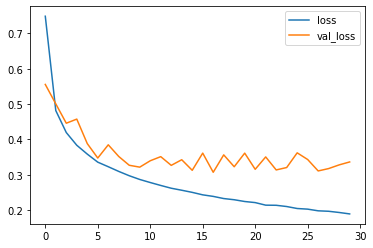

In [33]:
plt.plot(history.epoch, history.history.get('loss'), label="loss")
plt.plot(history.epoch, history.history.get('val_loss'), label="val_loss")
plt.legend()